<a href="https://colab.research.google.com/github/ozgedurna/hava_bas-nc-tahmini/blob/main/havatahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
train_df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
test_df= pd.read_csv("/content/DailyDelhiClimateTest.csv")
print(train_df.head())
print(test_df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [ ]:
test_df= test_df[test_df["meanpressure"]>900]

In [ ]:
train_df["date"]=pd.to_datetime(train_df["date"])
test_df["date"]=pd.to_datetime(test_df["date"])

In [ ]:
train_df["day_of_year"] =train_df["date"].dt.dayofyear
train_df["month"]=train_df["date"].dt.month

def get_season(month):
  if month in [12,  1, 2]:
    return 0
  elif month in [3, 4, 5]:
    return 1
  elif month in [6, 7, 8]:
    return 2
  else:
    return 3

train_df["season"]=train_df["month"].apply(get_season)


test_df["day_of_year"] =test_df["date"].dt.dayofyear
test_df["month"]=test_df["date"].dt.month
test_df["season"]= test_df["month"].apply(get_season)

In [ ]:
train_df["target_pressure"]= train_df["meanpressure"].shift(-1)
test_df["target_pressure"]= test_df["meanpressure"].shift(-1)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [ ]:
features=["meantemp" , "humidity", "wind_speed", "day_of_year", "month", "season"]

x_train= train_df[features]
y_train=train_df["target_pressure"]

x_test= test_df[features]
y_test=test_df["target_pressure"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 124.122102394738
R²: -2.8436852804492254


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
corr_matrix = train_df.corr(numeric_only=True)
print(corr_matrix)


                 meantemp  humidity  wind_speed  meanpressure  day_of_year  \
meantemp         1.000000 -0.570510    0.305011     -0.038838     0.117502   
humidity        -0.570510  1.000000   -0.372565      0.001693     0.079363   
wind_speed       0.305011 -0.372565    1.000000     -0.020658    -0.161572   
meanpressure    -0.038838  0.001693   -0.020658      1.000000    -0.031880   
day_of_year      0.117502  0.079363   -0.161572     -0.031880     1.000000   
month            0.120647  0.077726   -0.162567     -0.035056     0.996501   
season           0.530382 -0.115671   -0.015101     -0.034312     0.571771   
target_pressure -0.038114  0.002627   -0.008021      0.003101    -0.031472   

                    month    season  target_pressure  
meantemp         0.120647  0.530382        -0.038114  
humidity         0.077726 -0.115671         0.002627  
wind_speed      -0.162567 -0.015101        -0.008021  
meanpressure    -0.035056 -0.034312         0.003101  
day_of_year      0.996

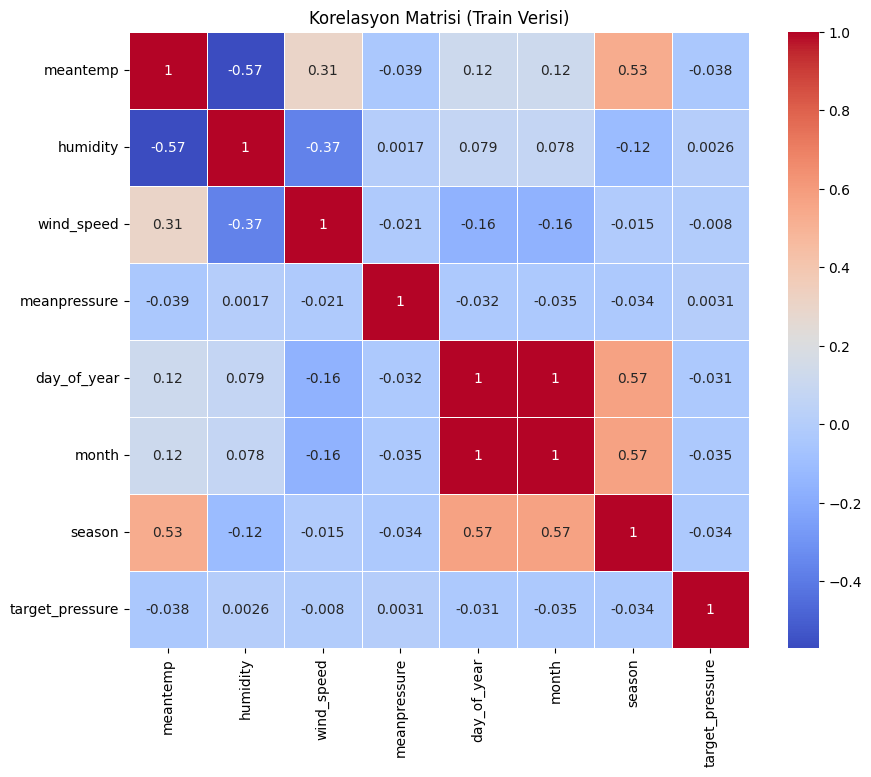

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasyon Matrisi (Train Verisi)")
plt.show()
